# Time Series Analysis 

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

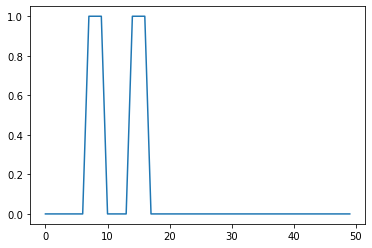

In [2]:
signal = np.zeros(50)
signal[7:10] = 1
signal[14:17] = 1
plt.plot(signal)

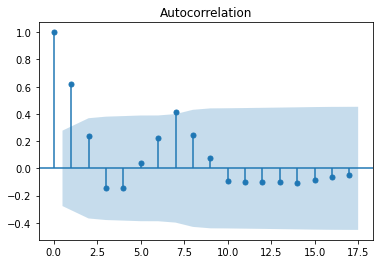

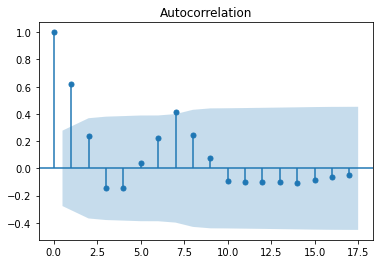

In [3]:
plot_acf(signal)

In [4]:
url = 'https://www.esrl.noaa.gov/gmd/webdata/ccgg/trends/co2/co2_mm_mlo.txt'

In [5]:
df = pd.read_csv(url, skiprows=53, delim_whitespace=True)

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [ ]:
df.columns = ['year', 'month', 'time', 'co2', 'deseasoned', 'nr_days', 'std_days', 'uncertainty']

In [ ]:
df.head()

In [ ]:
df.plot('time', 'co2')

In [ ]:
result_add = seasonal_decompose(df['co2'], model='additive', period=12, extrapolate_trend='freq')

In [ ]:
result_add.plot()
pil_kwargs = {'quality': 90}
plt.savefig('TSA_decomposition.jpg', dpi=200, pil_kwargs=pil_kwargs)
plt.show()

In [ ]:
%matplotlib inline

In [ ]:
plt.plot(result_add.resid, '-')
# plt.xlim(0, 100)

In [ ]:
plot_acf(result_add.resid)
plt.show()

In [ ]:
plot_pacf(result_add.resid)
plt.show()

In [ ]:
model = ARIMA(result_add.resid, order=(1,0,1))
model_fit = model.fit()
print(model_fit.summary())

In [ ]:
model = ARIMA(result_add.resid, order=(0,0,2))
model_fit = model.fit()
print(model_fit.summary())

In [ ]:
x = [0, 0]
for ii in range(200):
    x.append(x[-1] - 0.5*x[-2] + float(np.random.randn(1)))


In [ ]:
plt.plot(x)

In [ ]:
from statsmodels import tsa
np.set_printoptions(precision=2)
np.random.seed(12345)
arparams = np.array([.75, -.25])
maparams = np.array([.65, .35])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
arma_process = tsa.arima_process.ArmaProcess(ar, ma)
y = arma_process.generate_sample(250)

In [ ]:
model = tsa.arima.model.ARIMA(y, order=(2, 0, 2), trend='n')
fit = model.fit()
print(fit.summary())

In [ ]:
fit.params

In [ ]:
plot_acf(np.array(x))

In [ ]:
model = ARIMA(np.array(x), order=(2,0,0))
model_fit = model.fit()
print(model_fit.summary())

In [ ]:
# Define the parameters
ars = [[1, 0.9], [1, -0.9]]
mas = [[1, 0.9], [1, -0.9]]

arma_list = []
for ar in ars:
    ma = None
    arma_list.append([ar, ma])
for ma in mas:
    ar = None
    arma_list.append([ar, ma])

np.random.seed(123)
for arma in arma_list:
    ar = arma[0]
    ma = arma[1]
    # Generate the data
    arma_process = tsa.arima_process.ArmaProcess(ar, ma)
    y = arma_process.generate_sample(100)

    # Fit the model
    print(f'ARMA = {arma}')
    if ar is None:
        model = ARIMA(y, order=(0,0,1))
    else:
        model = ARIMA(y, order=(1,0,0))
        
    model_fit = model.fit()
    print(model_fit.summary())

    # Plotdata,  ACF and PACF
    fig, axs = plt.subplots(3,1)
    axs[0].plot(y)
    axs[0].set_title(f'ar={ar}, ma={ma}')
    plot_acf(y, ax=axs[1]);
    plot_pacf(y, ax=axs[2])
    plt.tight_layout()

In [ ]:
fig, axs = plt.subplots(2,1)
axs[0].plot(y)
plot_acf(y, ax=axs[1]);

In [ ]:
x = [1]
len(x)

In [ ]:
y = None
len(y)

In [ ]:
len([y])

In [ ]:
len[x]

In [ ]:
y is None
